# Project 1: Driving Licenses, Traffic Accidents and Casualties Analysis

From the data provided by the Traffic Department of the Ministry of Interior to monitor traffic accidents. It was analysed to provide recommendations to help reduce traffic accidents. We analyzed a dataset showing the number of traffic accidents in the regions in 2016-2017 and a dataset showing the number of driver's licenses issued in 1993-2017.

## Problem Statment

Craft your problem statement here using the prompt from the README and other sources you find during your investigation.

- The Traffic Department of the Ministry of Interior faced a problem in increasing traffic accidents in 2016-2017 and the average rate of traffic accidents in Saudi Arabia was up to (41029-35422) and there are regions in Saudi Arabia that exceed this average and have increased the level of damage caused by accidents.

## Executive Summary
Write an executive summary that summarizes the problem and your key findings.

We find two issues in the data that should be the main focus of the General Department of traffic going forward:

- While traffic accidents in most regions are relatively similar, three regions have far above the mean traffic accidents: Makkah, Riyadh and the Eastern Region.

- The Traffic Department of the Ministry of Interior should focus on the regions mentioned in the previous point, which have a high population density.

### Contents:
- [Datasets Description](#Datasets-Description)
- [Data Import & Cleaning](#Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-data)
- [Descriptive and Inferential Statistics](#Descriptive-and-Inferential-Statistics)
- [Outside Research](#Outside-Research)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

**If you combine your problem statement, executive summary, data dictionary, and conclusions/recommendations, you have an amazing README.md file that quickly aligns your audience to the contents of your project.** Don't forget to cite your data sources!

*All libraries used should be added here, including any Jupyter magic commands*

In [2]:
#Imports the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Datasets Description

[Driving Licenses](https://datasource.kapsarc.org/explore/dataset/saudi-arabia-driving-licenses-issued-in-the-kingdom-2004-2008/information/?disjunctive.administritive_area&sort=time_period&location=5,24.37495,45.08024&basemap=jawg.streets)
This dataset contains Saudi Arabia Driving Licenses Issued By Administrative Area for 1993 - 2016. Data from General Authority for Statistics . Follow datasource.kapsarc.org for timely data to advance energy economics research.

[Traffic Accidents and Casualties](https://datasource.kapsarc.org/explore/dataset/saudi-arabia-traffic-accidents-and-casualties-injured-dead-2008/export/?disjunctive.region&disjunctive.indicator&sort=time_period)
This dataset contains Saudi Arabia Traffic Accidents and Casualties by Region for 2016. Data from General Authority for Statistics. Follow datasource.kapsarc.org for timely data to advance energy economics research.


## Data Import and Cleaning

#### 1. Read In Driving Licenses & Traffic Accidents Data
Read in the `saudi-arabia-traffic-accidents-2008.csv` and `saudi-arabia-driving-licenses-2004-2008.csv` files and assign them to appropriately named pandas dataframes.

In [3]:
#Code
#reading the csv file 
ksa_traff_accid = pd.read_csv('../data/saudi-arabia-traffic-accidents-2008.csv',sep=';')
ksa_driv_lic = pd.read_csv('../data/saudi-arabia-driving-licenses-2004-2008.csv',sep=';')

#### 2. Display data

Print the first 10 rows of each dataframe to your jupyter notebook

In [4]:
#Code
#display View head and tail to check data characters and if they contain null values.. 
ksa_traff_accid.head(10)

,Unnamed: 0,Unnamed: 0.1,Year,Region,Indicator,Value,geo_point_2d
0,0,0,(2016),Makkah,No. of Casualties - Injured,12383n,"21.628962766, 41.2636898334"
1,1,1,(2016),Eastern Region,No. of Casualties - Dead,1113n,"23.2883307307, 50.1478302439"
2,2,2,(2016),Tabouk,No. of Casualties - Dead,434n,"27.90165499, 37.2598581394"
3,3,3,(2016),Hail,No. of Casualties - Dead,299n,"27.400845724, 41.4406960508"
4,4,4,(2016),Hail,No. of Accidents,10199n,"27.400845724, 41.4406960508"
5,5,5,(2016),Northern Boarder,No. of Casualties - Dead,193n,"30.197074783, 41.8171186952"
6,6,6,(2017),Jazan,No. of Accidents,22161n,"17.2072313962, 42.6525807422"
7,7,7,(2017),Al-Jouf,No. of Accidents,10469n,"29.9677445762, 39.5570371172"
8,8,8,(2017),Total,No. of Casualties - Dead,7489n,NaN
9,9,9,(2016),Northern Boarder,No. of Casualties - Injured,631n,"30.197074783, 41.8171186952"


In [5]:
ksa_traff_accid.tail(10)

,Unnamed: 0,Unnamed: 0.1,Year,Region,Indicator,Value,geo_point_2d
74,74,74,(2016),Qassim,No. of Casualties - Dead,397n,"26.1967063704, 43.3429998455"
75,75,75,(2016),Najran,No. of Casualties - Dead,173n,"18.4511003068, 46.8688495726"
76,76,76,(2016),Najran,No. of Casualties - Injured,706n,"18.4511003068, 46.8688495726"
77,77,77,(2016),Total,No. of Casualties - Dead,9031n,NaN
78,78,78,(2017),Makkah,No. of Accidents,145541n,"21.628962766, 41.2636898334"
79,79,79,(2017),Asir,No. of Casualties - Injured,2368n,"19.1387847401, 42.941470036"
80,80,80,(2017),Hail,No. of Casualties - Injured,773n,"27.400845724, 41.4406960508"
81,81,81,(2017),Al-Baaha,No. of Casualties - Dead,134n,"20.1484058503, 41.4665484892"
82,82,82,(2017),Al-Baaha,No. of Accidents,1414n,"20.1484058503, 41.4665484892"
83,83,83,(2017),Al-Baaha,No. of Casualties - Injured,1007n,"20.1484058503, 41.4665484892"


In [6]:
#drop the unnecessary columns..
ksa_traff_accid.drop(['Unnamed: 0','Unnamed: 0.1'], axis=1,inplace=True)

In [7]:
#Using .strip to delete the character so we can edit the data type later..
ksa_traff_accid['Value'] = ksa_traff_accid['Value'].str.strip('n')

In [8]:
ksa_traff_accid['Year'] = ksa_traff_accid['Year'].str.strip('()')

In [9]:
#Check the data after strip..
ksa_traff_accid.head(2)

,Year,Region,Indicator,Value,geo_point_2d
0,2016,Makkah,No. of Casualties - Injured,12383,"21.628962766, 41.2636898334"
1,2016,Eastern Region,No. of Casualties - Dead,1113,"23.2883307307, 50.1478302439"


In [10]:
#display View head and tail to check data characters and if they contain null values..
ksa_driv_lic.head(10)

,Unnamed: 0,Year,Administritive Area,Driving Liceses,geo_point_2d
0,0,(2012),Makkah,143954n,"21.628962766, 41.2636898334"
1,1,(1994),Makkah,75349n,"21.628962766, 41.2636898334"
2,2,(1998),Makkah,86082n,"21.628962766, 41.2636898334"
3,3,(2004),Makkah,86636n,"21.628962766, 41.2636898334"
4,4,(2005),Makkah,65099n,"21.628962766, 41.2636898334"
5,5,(2008),Makkah,77013n,"21.628962766, 41.2636898334"
6,6,(2014),Madinah,31447n,"24.927534539, 39.4918237173"
7,7,(2013),Madinah,28513n,"24.927534539, 39.4918237173"
8,8,(2012),Madinah,14459n,"24.927534539, 39.4918237173"
9,9,(1994),Madinah,3767n,"24.927534539, 39.4918237173"


In [11]:
ksa_driv_lic.tail(10)

,Unnamed: 0,Year,Administritive Area,Driving Liceses,geo_point_2d
340,340,(2004),Assir,17947n,"19.1387847401, 42.941470036"
341,341,(2009),Assir,21582n,"19.1387847401, 42.941470036"
342,342,(2016),Tabouk,13610n,"27.90165499, 37.2598581394"
343,343,(2012),Tabouk,11391n,"27.90165499, 37.2598581394"
344,344,(1999),Tabouk,5298n,"27.90165499, 37.2598581394"
345,345,(2000),Tabouk,8473n,"27.90165499, 37.2598581394"
346,346,(2006),Tabouk,8259n,"27.90165499, 37.2598581394"
347,347,(2013),Hail,9731n,"27.400845724, 41.4406960508"
348,348,(1997),Hail,6606n,"27.400845724, 41.4406960508"
349,349,(1999),Hail,3139n,"27.400845724, 41.4406960508"


In [12]:
#drop the unnecessary columns..
ksa_driv_lic.drop(['Unnamed: 0'], axis=1,inplace=True)

In [13]:
#Using.strip() to delete the character so we can edit the data type later..
ksa_driv_lic['Driving Liceses'] = ksa_driv_lic['Driving Liceses'].str.strip('n')

In [14]:
#Using .strip to delete the character so we can edit the data type later..
ksa_driv_lic['Year'] = ksa_driv_lic['Year'].str.strip('()')

In [15]:
#Using .replace to replace the character so we can edit the data type later..
ksa_driv_lic.columns = ksa_driv_lic.columns.str.replace(' ', '')

In [16]:
#check the data
ksa_driv_lic.head(2)

,Year,AdministritiveArea,DrivingLiceses,geo_point_2d
0,2012,Makkah,143954,"21.628962766, 41.2636898334"
1,1994,Makkah,75349,"21.628962766, 41.2636898334"


#### 3. Briefly describe the data

Take your time looking through the data and briefly describe the data in the markdown cell below. Note things about what the columns might mean, and the general information that is conveyed in the dataframe.

Answer:

#### 4a. How complete is the data?

Investigate missing values etc.

In [17]:
#Code
#check if there is null values in data by using .info() or .isnull
ksa_traff_accid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 5 columns):
Year            84 non-null object
Region          84 non-null object
Indicator       84 non-null object
Value           84 non-null object
geo_point_2d    78 non-null object
dtypes: object(5)
memory usage: 3.4+ KB


In [18]:
# calculate null values in data by using .sum()..
ksa_traff_accid.isnull().sum()

Year            0
Region          0
Indicator       0
Value           0
geo_point_2d    6
dtype: int64

In [19]:
#drop the null values
ksa_traff_accid.dropna(inplace=True)

In [20]:
#check if there is null values in data by using .info() or .isnull
ksa_driv_lic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 4 columns):
Year                  350 non-null object
AdministritiveArea    350 non-null object
DrivingLiceses        350 non-null object
geo_point_2d          325 non-null object
dtypes: object(4)
memory usage: 11.1+ KB


In [21]:
ksa_driv_lic.isnull().sum()

Year                   0
AdministritiveArea     0
DrivingLiceses         0
geo_point_2d          25
dtype: int64

In [22]:
ksa_driv_lic.dropna(inplace=True)

#### 4b. Are there any obvious issues with the observations?

**What is the minimum *possible* value for each dataset? What is the maximum *possible* value?**

In [23]:
#Code
#find the Max & Min 
np.min(ksa_traff_accid), np.max(ksa_traff_accid)

(Year                                    2016
 Region                              Al-Baaha
 Indicator                   No. of Accidents
 Value                                   1007
 geo_point_2d    17.2072313962, 42.6525807422
 dtype: object, Year                                   2017
 Region                               Tabouk
 Indicator       No. of Casualties - Injured
 Value                                 99925
 geo_point_2d    30.197074783, 41.8171186952
 dtype: object)

In [24]:
np.min(ksa_driv_lic), np.max(ksa_driv_lic)

(Year                                          1993
 AdministritiveArea                         Al-Baha
 DrivingLiceses                              100291
 geo_point_2d          17.2072313962, 42.6525807422
 dtype: object, Year                                         2017
 AdministritiveArea                         Tabouk
 DrivingLiceses                               9983
 geo_point_2d          30.197074783, 41.8171186952
 dtype: object)

#### 5. What are your data types? 
Display the data types of each feature. 

In [25]:
#code
#Using .dtypes to know the data type for ksa_traff_accid dataframe..
ksa_traff_accid.dtypes

Year            object
Region          object
Indicator       object
Value           object
geo_point_2d    object
dtype: object

In [26]:
##Using .dtypes to know the data type for ksa_driv_lic dataframe ..
ksa_driv_lic.dtypes

Year                  object
AdministritiveArea    object
DrivingLiceses        object
geo_point_2d          object
dtype: object

What did you learn?
- Do any of them seem odd?  
- Which ones are not as they should be?  

Answer:

#### 6. Fix incorrect data types
Based on what you discovered above, use appropriate methods to re-type incorrectly typed data.
- Define a function that will allow you to convert numerical columns to an appropriate numeric type. Use `map` or `apply` to change these columns in each dataframe.

In [27]:
#code
# change the Year&Value columns for ksa_traff_accid dataframe from string to intger..
ksa_traff_accid['Year']=ksa_traff_accid['Year'].apply(pd.to_numeric)
ksa_traff_accid['Value']=ksa_traff_accid['Value'].apply(pd.to_numeric)
#ksa_traff_accid['geo_point_2d']=ksa_traff_accid['geo_point_2d'].apply(string())

In [28]:
#check the changing in the data type..
ksa_traff_accid.dtypes

Year             int64
Region          object
Indicator       object
Value            int64
geo_point_2d    object
dtype: object

In [29]:
# change the Year&Value columns for ksa_driv_lic dataframe from string to intger..
ksa_driv_lic['Year']=ksa_driv_lic['Year'].apply(pd.to_numeric)
ksa_driv_lic['DrivingLiceses']=ksa_driv_lic['DrivingLiceses'].apply(pd.to_numeric)

In [30]:
#check the changing in the data type..
ksa_driv_lic.dtypes

Year                   int64
AdministritiveArea    object
DrivingLiceses         int64
geo_point_2d          object
dtype: object

- Make new columns `x` and `y` using `geo_point_2d`

In [31]:
#code
#Using .apply() with lambda to create a new columns 'x'&'y' from geo_point_2d column..
ksa_traff_accid['x'] = ksa_traff_accid['geo_point_2d'].apply(lambda geo_point_2d:geo_point_2d.split(',')[0])
ksa_traff_accid['y'] = ksa_traff_accid['geo_point_2d'].apply(lambda geo_point_2d:geo_point_2d.split(',')[1])

In [32]:
ksa_traff_accid.head(2)

,Year,Region,Indicator,Value,geo_point_2d,x,y
0,2016,Makkah,No. of Casualties - Injured,12383,"21.628962766, 41.2636898334",21.628962766,41.2636898334
1,2016,Eastern Region,No. of Casualties - Dead,1113,"23.2883307307, 50.1478302439",23.2883307307,50.1478302439


In [33]:
#drop the column geo_point_2d
ksa_traff_accid.drop(['geo_point_2d'], axis=1,inplace=True)

In [34]:
#change the type of x&y to numaric..
ksa_traff_accid['x']=ksa_traff_accid['x'].apply(pd.to_numeric)
ksa_traff_accid['y']=ksa_traff_accid['y'].apply(pd.to_numeric)

In [35]:
#Using .apply() with lambda to create a new columns 'x'&'y' from geo_point_2d column..
ksa_driv_lic['x'] = ksa_driv_lic['geo_point_2d'].apply(lambda geo_point_2d:geo_point_2d.split(',')[0])
ksa_driv_lic['y'] = ksa_driv_lic['geo_point_2d'].apply(lambda geo_point_2d:geo_point_2d.split(',')[1])

In [36]:
ksa_driv_lic.head(2)

,Year,AdministritiveArea,DrivingLiceses,geo_point_2d,x,y
0,2012,Makkah,143954,"21.628962766, 41.2636898334",21.628962766,41.2636898334
1,1994,Makkah,75349,"21.628962766, 41.2636898334",21.628962766,41.2636898334


In [37]:
#change the type of x&y to numaric..
ksa_driv_lic['x']=ksa_driv_lic['x'].apply(pd.to_numeric)
ksa_driv_lic['y']=ksa_driv_lic['y'].apply(pd.to_numeric)

In [38]:
#drop the column geo_point_2d
ksa_driv_lic.drop(['geo_point_2d'], axis=1,inplace=True)

- Fix any individual values preventing other columns from being the appropriate type.

In [39]:
#check the values using .unique()..
ksa_driv_lic.AdministritiveArea.unique()

array(['Makkah', 'Madinah', 'Al-Qaseem', 'Eastern', 'Assir', 'Tabouk',
       'Hail', 'Northern Boarder', 'Jazan', 'Najran', 'Al-Baha',
       'Al-Jouf', 'Riyadh'], dtype=object)

In [40]:
#replace the names of the values in AdministritiveArea to match with the same values in the ksa_traff_accid in region columns, so that will help in merging later.. 
ksa_driv_lic.replace(to_replace ="Al-Qaseem", 
                 value ="Qassim",inplace=True) 
ksa_driv_lic.replace(to_replace ="Eastern", 
                 value ="Eastern Region",inplace=True)
ksa_driv_lic.replace(to_replace ="Assir", 
                 value ="Asir",inplace=True)
ksa_driv_lic.replace(to_replace ="Al-Baha", 
                 value ="Al-Baaha",inplace=True)

In [41]:
#check the values using .unique()..
ksa_driv_lic.AdministritiveArea.unique()

array(['Makkah', 'Madinah', 'Qassim', 'Eastern Region', 'Asir', 'Tabouk',
       'Hail', 'Northern Boarder', 'Jazan', 'Najran', 'Al-Baaha',
       'Al-Jouf', 'Riyadh'], dtype=object)

- Finish your data modifications by making sure the columns are now typed appropriately.

In [42]:
ksa_traff_accid.head(2)

,Year,Region,Indicator,Value,x,y
0,2016,Makkah,No. of Casualties - Injured,12383,21.628963,41.26369
1,2016,Eastern Region,No. of Casualties - Dead,1113,23.288331,50.14783


In [43]:
#code
ksa_driv_lic.head(2)

,Year,AdministritiveArea,DrivingLiceses,x,y
0,2012,Makkah,143954,21.628963,41.26369
1,1994,Makkah,75349,21.628963,41.26369


- Display the data types again to confirm they are correct.

In [44]:
#Code:
# Using .dtypes to display the type of features..
ksa_traff_accid.dtypes

Year           int64
Region        object
Indicator     object
Value          int64
x            float64
y            float64
dtype: object

In [45]:
# Using .dtypes to display the type of features..
ksa_driv_lic.dtypes

Year                    int64
AdministritiveArea     object
DrivingLiceses          int64
x                     float64
y                     float64
dtype: object

#### 7. Rename columns
Change the names of the columns to more expressive names so that you can tell the difference the Driving Licenses  columns and the & Traffic Accidents columns. Your solution should map all column names being changed at once (no repeated singular name-changes). **We will be combining these two datasets, and so you should name columns in an appropriate way**.

**Guidelines**:
- Column names should be all lowercase (you will thank yourself when you start pushing data to SQL later in the course)
- Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`.
- Column names should be unique and informative (the only feature that we actually share between dataframes is the state).
- Please also fix any typos you see in the column names.

In [46]:
#code
# using .rename for the columns..
ksa_traff_accid.rename(columns={'Year':'year','Region':'region','Indicator':'indicator','Value':'value','x':'latitude_accid', 'y':'longitude_accid'},inplace=True)
ksa_traff_accid.head(2)

,year,region,indicator,value,latitude_accid,longitude_accid
0,2016,Makkah,No. of Casualties - Injured,12383,21.628963,41.26369
1,2016,Eastern Region,No. of Casualties - Dead,1113,23.288331,50.14783


In [47]:
# using .rename for the columns..
ksa_driv_lic.rename(columns={'Year':'year','AdministritiveArea':'region','DrivingLiceses':'driving_licenses','x':'latitude_lic', 'y':'longitude_lic'},inplace=True)
ksa_driv_lic.head(2)

,year,region,driving_licenses,latitude_lic,longitude_lic
0,2012,Makkah,143954,21.628963,41.26369
1,1994,Makkah,75349,21.628963,41.26369


#### 8. Create a data dictionary

Now that we've fixed our data, and given it appropriate names, let's create a [data dictionary](http://library.ucmerced.edu/node/10249). 

A data dictionary provides a quick overview of features/variables/columns, alongside data types and descriptions. The more descriptive you can be, the more useful this document is.

Example of a Fictional Data Dictionary Entry: 

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**county_pop**|*integer*|2010 census|The population of the county (units in thousands, where 2.5 represents 2500 people).| 
|**per_poverty**|*float*|2010 census|The percent of the county over the age of 18 living below the 200% of official US poverty rate (units percent to two decimal places 98.10 means 98.1%)|

[Here's a quick link to a short guide for formatting markdown in Jupyter notebooks](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html).

Provided is the skeleton for formatting a markdown table, with columns headers that will help you create a data dictionary to quickly summarize your data, as well as some examples. **This would be a great thing to copy and paste into your custom README for this project.**

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**year**|int|ksa_traff_accid,ksa_driv_lic|The years when driving licenses were issued and traffic accidents recorded. |
|**region**|object|ksa_traff_accid,ksa_driv_lic|The regions where driving licenses have been issued and traffic accidents recorded.|
|**indicator**|object|ksa_traff_accid|Classification of data into accidents, deaths and injuries.|
|**value**|int|ksa_traff_accid|Numbers of accidents, deaths and injuries.|
|**driving_licenses**|int|ksa_driv_lic|Number of licenses issued.|
|**latitude**|float|ksa_traff_accid,ksa_driv_lic|The latitude coordinate of the associated region.|
|**longitude**|float|ksa_traff_accid,ksa_driv_lic|The longitude coordinate of the associated region.|

#### 9. Drop unnecessary rows

This study concerns accident and license in regions/area. Please do the followings:
0. Which rows are not associated with regions?
1. Confirm the numbers of all regions add up to total.
2. Remove the rows that are not associated with regions

In [48]:
#Using the .nunique() to calculate the no.unique values.. 
ksa_traff_accid.region.nunique()

13

In [49]:
#code
#Using the .nunique() to calculate the no.unique values..
ksa_driv_lic.region.nunique()

13

#### 10a. Data formats
Is the License data in long or wide format? How about the Accident data? And why?

In [50]:
#Using .pivot_table to stored in MultiIndex objects (hierarchical indexes) on the columns..
ksa_traff_accid_1= ksa_traff_accid.pivot_table(values='value',index=['year','region'],columns='indicator')
ksa_traff_accid_1.head()

indicator            No. of Accidents  No. of Casualties - Dead  \
year region                                                       
2016 Al-Baaha                    3618                       185   
     Al-Jouf                    10212                       245   
     Asir                       32684                       983   
     Eastern Region            101619                      1113   
     Hail                       10199                       299   

indicator            No. of Casualties - Injured  
year region                                       
2016 Al-Baaha                               1227  
     Al-Jouf                                 920  
     Asir                                   2541  
     Eastern Region                         4893  
     Hail                                    932

In [51]:
#Reset the index of the DataFrame..
ksa_traff_accid_1.reset_index()

indicator,year,region,No. of Accidents,No. of Casualties - Dead,No. of Casualties - Injured
0,2016,Al-Baaha,3618,185,1227
1,2016,Al-Jouf,10212,245,920
2,2016,Asir,32684,983,2541
3,2016,Eastern Region,101619,1113,4893
4,2016,Hail,10199,299,932
5,2016,Jazan,25873,514,2259
6,2016,Madinah,14475,822,4184
7,2016,Makkah,134838,2243,12383
8,2016,Najran,3235,173,706
9,2016,Northern Boarder,13196,193,631


In [52]:
# remove the name of the index
ksa_traff_accid_1.index.name= None

In [53]:
# Using .rename to change the names of the columns..
ksa_traff_accid_1.rename(columns={'No. of Accidents':'accidents','No. of Casualties - Dead':'death','No. of Casualties - Injured':'injured'},inplace=True)
ksa_traff_accid_1.head(2)

indicator      accidents  death  injured
year region                             
2016 Al-Baaha       3618    185     1227
     Al-Jouf       10212    245      920

#### 10b. Changing formats
Which format would work best for both dataframes? Transform the datasets to the same format before merging in the next task.

In [54]:
#I did change the regions names in Q6..

#### 11. Merge dataframes

Join the Driving Licenses & Traffic Accidents dataframes using the **region** and **year** in each dataframe as the key. Assign this to a new variable. Which join should you use to preserve the most data?

In [55]:
# using outer merge for ksa_traff_accid,ksa_driv_lic dataframes to  to preserve the most data and combines all the rows for left and right dataframes.. 
both_accid_lic= pd.merge(ksa_traff_accid_1,ksa_driv_lic, on=['year','region'], how='outer', indicator=True)
both_accid_lic.head()

,year,region,accidents,death,injured,driving_licenses,latitude_lic,longitude_lic,_merge
0,2016,Al-Baaha,3618.0,185.0,1227.0,4614,20.148406,41.466548,both
1,2016,Al-Jouf,10212.0,245.0,920.0,9371,29.967745,39.557037,both
2,2016,Asir,32684.0,983.0,2541.0,41367,19.138785,42.941470,both
3,2016,Eastern Region,101619.0,1113.0,4893.0,142307,23.288331,50.147830,both
4,2016,Hail,10199.0,299.0,932.0,54507,27.400846,41.440696,both


In [56]:
#using inner merge for keeps only the common values in both the left and right dataframes to have a good values with out Nan.
both_accid_lic= pd.merge(ksa_traff_accid_1,ksa_driv_lic, on=['year','region'], how='inner')
both_accid_lic.head()

,year,region,accidents,death,injured,driving_licenses,latitude_lic,longitude_lic
0,2016,Al-Baaha,3618,185,1227,4614,20.148406,41.466548
1,2016,Al-Jouf,10212,245,920,9371,29.967745,39.557037
2,2016,Asir,32684,983,2541,41367,19.138785,42.941470
3,2016,Eastern Region,101619,1113,4893,142307,23.288331,50.147830
4,2016,Hail,10199,299,932,54507,27.400846,41.440696


#### 12. Save your cleaned, merged dataframe

Use a relative path to save out your data as `combined_datasets.csv`.

In [57]:
#code
# save the data after the merge..
both_accid_lic.to_csv('combined_datasets.csv')

## Exploratory Data Analysis


### Summary Statistics
Transpose the output of pandas `describe` method to create a quick overview of each numeric feature.

In [58]:
#Code:
#using .describe() 
both_accid_lic.describe()

,year,accidents,death,injured,driving_licenses,latitude_lic,longitude_lic
count,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000
mean,2016.500000,38225.692308,635.384615,2743.038462,62507.000000,23.810447,42.602789
std,0.509902,46493.705035,549.783381,2922.641127,107293.917762,4.274533,3.313532
min,2016.000000,1414.000000,112.000000,374.000000,2153.000000,17.207231,37.259858
25%,2016.000000,10276.250000,241.250000,923.000000,8363.250000,20.148406,41.263690
50%,2016.500000,16050.500000,415.500000,1618.500000,16085.000000,23.288331,41.817119
75%,2017.000000,30981.250000,929.250000,3784.000000,51222.000000,27.400846,43.343000
max,2017.000000,145541.000000,2243.000000,12383.000000,495307.000000,30.197075,50.147830


#### Manually calculate standard deviation

$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

- Write a function to calculate standard deviation using the formula above

In [59]:
#calculate the std for numaric values..
def stdev(data):
    average = np.mean(data)
    v_list = []
    for x in data:
        var = (x-average)**2
        v_list.append(var)
    sqrt_er = np.sqrt(sum(v_list) / len(v_list))
    return sqrt_er

- Use a **dictionary comprehension** to apply your standard deviation function to each numeric column in the dataframe.  **No loops**  
- Assign the output to variable `sd` as a dictionary where: 
    - Each column name is now a key 
    - That standard deviation of the column is the value 
     
*Example Output :* `{'Driving_Licenses_x': 120, 'Traffic_Accidents_x': 120, ...}`

In [60]:
# Creating a data set with only numeric columns from 'both_accid_lic' dataset
both_numeric = both_accid_lic[['accidents', 'death','injured', 'driving_licenses']]
both_numeric.columns

Index(['accidents', 'death', 'injured', 'driving_licenses'], dtype='object')

In [61]:
#Code:
# Dict comprehension
sd = {both_numeric.columns[i]:stdev(both_numeric[x].values) for i, x in enumerate(both_numeric.columns)}
sd

{'accidents': 45590.82869880505,
 'death': 539.1069593406002,
 'injured': 2865.885411322023,
 'driving_licenses': 105210.34237659337}

Do your manually calculated standard deviations match up with the output from pandas `describe`? What about numpy's `std` method?

Answer:

#### Investigate trends in the data
Using sorting and/or masking (along with the `.head` method to not print our entire dataframe), consider the following questions:

- Which regions have the highest and lowest Driving Licenses based on years (1993 - 2017)
- Which regions have the highest and lowest mean Traffic Accidents numbers for years (2016 - 2017)
- What are the regions that have more Driving Licenses issued in each year than the year average?
- What are the regions that have more Traffic Accidents happened in each year than the year average?

Based on what you've just observed, have you identified any regions that you're especially interested in? **Make a note of these and state *why* you think they're interesting**.

**You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

In [62]:
#code
# Regions with highest and lowest Driving Licenses based on years (1993 - 2017)..
ksa_driv_lic = ksa_driv_lic.sort_values('driving_licenses', ascending=False)
ksa_driv_lic.head(7)

,year,region,driving_licenses,latitude_lic,longitude_lic
292,2017,Riyadh,495307,23.081434,45.585751
293,2016,Riyadh,242851,23.081434,45.585751
155,2014,Riyadh,194208,23.081434,45.585751
65,2013,Riyadh,165994,23.081434,45.585751
68,2015,Makkah,157389,21.628963,41.263690
95,2011,Eastern Region,151087,23.288331,50.147830
72,2014,Makkah,149234,21.628963,41.263690


by sorting the data using the driving_licenses column, the highest regions are Riyadh, Makkah and Eastern region..

In [63]:
ksa_driv_lic.tail(7)

,year,region,driving_licenses,latitude_lic,longitude_lic
34,1993,Northern Boarder,1510,30.197075,41.817119
53,1996,Al-Baaha,1468,20.148406,41.466548
281,1994,Northern Boarder,1457,30.197075,41.817119
167,1996,Northern Boarder,1383,30.197075,41.817119
280,1995,Northern Boarder,1318,30.197075,41.817119
180,2007,Al-Baaha,997,20.148406,41.466548
210,2015,Tabouk,915,27.901655,37.259858


by sorting the data using the driving_licenses column, the lowest regions are Tabouk, Al-Baaha and Northern Boarder..

In [64]:
# Regions with highest and lowest mean Traffic Accidents numbers for years (2016 - 2017)..
# Using .groupby to calculate the .mean of driving_licenses for each region..
regions_mean=both_accid_lic.groupby('region').mean().sort_values('accidents', ascending=False)
regions_mean.head(7)

,year,accidents,death,injured,driving_licenses,latitude_lic,longitude_lic
region,,,,,,,
Makkah,2016.5,140189.5,1942.0,11503.0,139271.0,21.628963,41.263690
Riyadh,2016.5,120830.5,1414.5,4373.5,369079.0,23.081434,45.585751
Eastern Region,2016.5,91526.0,1038.0,4483.0,134561.5,23.288331,50.147830
Asir,2016.5,28964.5,905.5,2454.5,40250.0,19.138785,42.941470
Qassim,2016.5,24034.5,358.0,1479.5,7749.0,26.196706,43.343000
Jazan,2016.5,24017.0,490.0,2233.0,14924.5,17.207231,42.652581
Madinah,2016.5,15272.5,701.0,3550.5,30352.5,24.927535,39.491824


Makkah, Riyadh and Eastern region have the highest mean of accidents..

In [65]:
regions_mean.tail(7)

,year,accidents,death,injured,driving_licenses,latitude_lic,longitude_lic
region,,,,,,,
Madinah,2016.5,15272.5,701.0,3550.5,30352.5,24.927535,39.491824
Tabouk,2016.5,13872.0,391.0,1483.5,11921.0,27.901655,37.259858
Northern Boarder,2016.5,12368.0,152.5,502.5,5119.0,30.197075,41.817119
Al-Jouf,2016.5,10340.5,242.5,891.0,8731.0,29.967745,39.557037
Hail,2016.5,9789.0,282.0,852.5,38271.0,27.400846,41.440696
Najran,2016.5,3214.0,183.5,736.0,7989.0,18.451100,46.868850
Al-Baaha,2016.5,2516.0,159.5,1117.0,4372.5,20.148406,41.466548


Al-Baaha, Hail and Najran regions have the lowest mean of accidents..

In [66]:
#Regions that have more Driving Licenses issued in each year than the year average..
# Using .groupby to calculate the .mean of driving_licenses for each region in year..
year_mean = both_accid_lic.groupby('year').driving_licenses.mean()
both_accid_lic['year_m_lic'] = both_accid_lic.year.apply(lambda x: year_mean[x])

In [67]:
# calculate driving_licenses > the mean by groupby the year..
highest_regions_licenses = both_accid_lic[both_accid_lic.driving_licenses > both_accid_lic.year_m_lic]
highest_regions_licenses.sort_values('driving_licenses', ascending=False).head(7)

,year,region,accidents,death,injured,driving_licenses,latitude_lic,longitude_lic,year_m_lic
24,2017,Riyadh,99925,1399,4540,495307,23.081434,45.585751,71397.307692
11,2016,Riyadh,141736,1430,4207,242851,23.081434,45.585751,53616.692308
20,2017,Makkah,145541,1641,10623,142487,21.628963,41.263690,71397.307692
3,2016,Eastern Region,101619,1113,4893,142307,23.288331,50.147830,53616.692308
7,2016,Makkah,134838,2243,12383,136055,21.628963,41.263690,53616.692308
16,2017,Eastern Region,81433,963,4073,126816,23.288331,50.147830,71397.307692
4,2016,Hail,10199,299,932,54507,27.400846,41.440696,53616.692308


Riyadh, Makkah and Eastern Region are have more Driving Licenses issued in each year than the mean year..  

In [68]:
# Using .groupby to calculate the .mean of accidents for each region in year..
year_mean = both_accid_lic.groupby('year').accidents.mean()
both_accid_lic['year_m_accid'] = both_accid_lic.year.apply(lambda x: year_mean[x])

In [69]:
# calculate accidents > the mean by groupby the year..
highest_regions_accidents = both_accid_lic[both_accid_lic.accidents > both_accid_lic.year_m_accid]
highest_regions_accidents.sort_values('accidents', ascending=False).head(7)

,year,region,accidents,death,injured,driving_licenses,latitude_lic,longitude_lic,year_m_lic,year_m_accid
20,2017,Makkah,145541,1641,10623,142487,21.628963,41.263690,71397.307692,35422.153846
11,2016,Riyadh,141736,1430,4207,242851,23.081434,45.585751,53616.692308,41029.230769
7,2016,Makkah,134838,2243,12383,136055,21.628963,41.263690,53616.692308,41029.230769
3,2016,Eastern Region,101619,1113,4893,142307,23.288331,50.147830,53616.692308,41029.230769
24,2017,Riyadh,99925,1399,4540,495307,23.081434,45.585751,71397.307692,35422.153846
16,2017,Eastern Region,81433,963,4073,126816,23.288331,50.147830,71397.307692,35422.153846


Riyadh, Makkah and Eastern Region are have more accidents in each year than the mean year..

Regions are Riyadh, Makkah and Eastern region that have more Driving Licenses issued in each year than the mean of year.. 

## Visualize the data

There's not a magic bullet recommendation for the right number of plots to understand a given dataset, but visualizing your data is *always* a good idea. Not only does it allow you to quickly convey your findings (even if you have a non-technical audience), it will often reveal trends in your data that escaped you when you were looking only at numbers.

Some recommendations on plotting:
- Plots have titles
- Plots have axis labels
- Plots have appropriate tick labels
- All text is legible in a plot
- Plots demonstrate meaningful and valid relationships
- Plots are interpreted to aid understanding

There is such a thing as too many plots, and there are a *lot* of bad plots. You might make some! (But hopefully not with the guided prompts below).

#### Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features

Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. **However**, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).

*example*:
```python
sns.heatmap(df.corr())
```

Please take time to format your output, adding a title. Look through some of the additional arguments and options. (Axis labels aren't really necessary, as long as the title is informative).

In [70]:
import matplotlib.pyplot as plt

sns.set_style('whitegrid') # just optional!
%matplotlib inline

#Setting display format to retina in matplotlib to see better quality images.
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

# Lines below are just to ignore warnings
import warnings
warnings.filterwarnings('ignore')

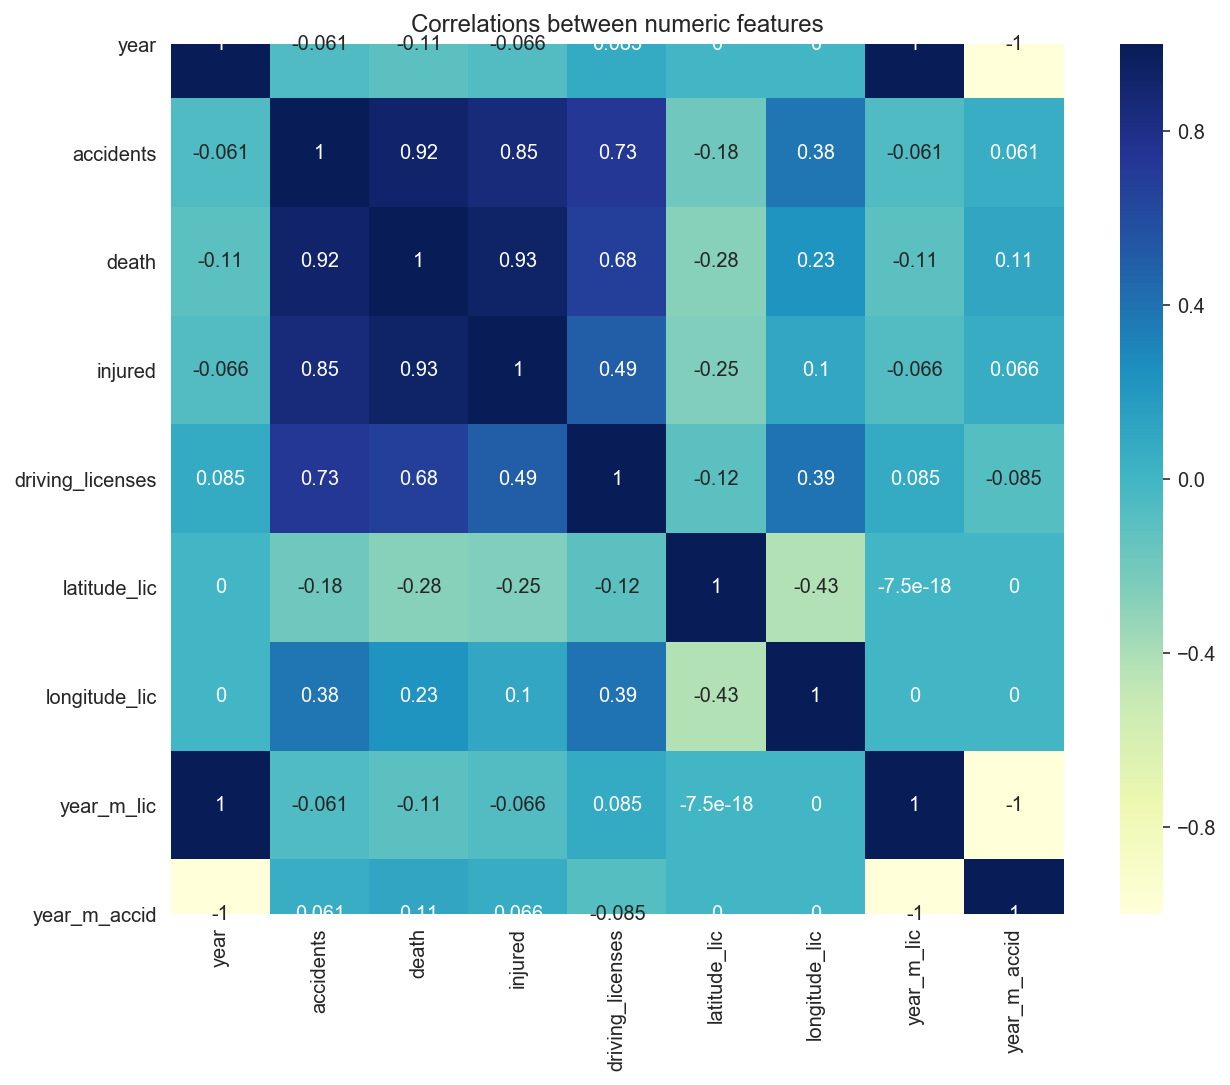

In [71]:
plt.figure(figsize=(10,8))
ax1= sns.heatmap(both_accid_lic.corr(),cmap="YlGnBu", annot = True,)
ax1.set_title('Correlations between numeric features')
plt.show()

#### Define a custom function to subplot histograms

We should write a function that will take the names of 2+ columns and subplot histograms. While you can use pandas plotting or Seaborn here, matplotlib gives you greater control over all aspects of your plots.

[Helpful Link for Plotting Multiple Figures](https://matplotlib.org/users/pyplot_tutorial.html#working-with-multiple-figures-and-axes)

Here's some starter code:

In [72]:
def subplot_histograms(dataframe, list_of_columns, list_of_titles, list_of_xlabels, figsize_tuple, bins_range = None):
    nrows = int(np.ceil(len(list_of_columns)/2)) # Makes sure you have enough rows
    fig, ax = plt.subplots(figsize=figsize_tuple,nrows=nrows, ncols=2) # You'll want to specify your figsize
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        ax[i].hist(dataframe[column],bins=bins_range) # feel free to add more settings
        ax[i].set_title(list_of_titles[i])# Set titles, labels, etc here for each subplot
        ax[i].set_xlabel(list_of_xlabels[i])

#### Plot and interpret histograms 
For each of the following:
- Driving Licenses number
- Traffic Accidents number

Please plot two additional histograms that will help with your understanding of the data

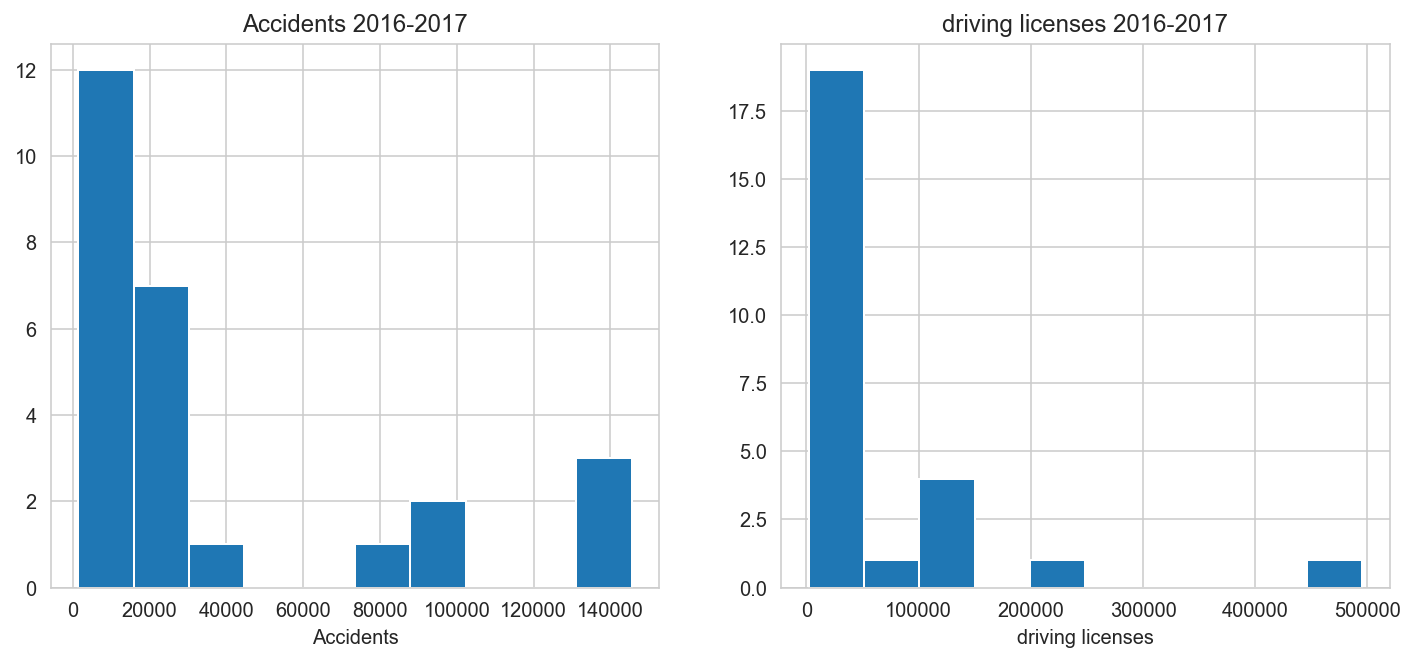

In [73]:
#create subplot for Accidents and driving_licenses features..
subplot_histograms(
    both_accid_lic,
    ['accidents','driving_licenses'],
    ['Accidents 2016-2017','driving licenses 2016-2017'],
    ['Accidents','driving licenses'],
   (12,5))

#### Plot and interpret scatter plots

For each of the following:
- Driving Licenses vs. Traffic Accidents for 2017
- Driving Licenses vs. Traffic Accidents for 2016
- Driving Licenses for 2016 vs 2017
- Traffic Accidents for 2016 vs 2017

Plot the two variables against each other using matplotlib or Seaborn

Your plots should show:
- Two clearly labeled axes
- A proper title
- Using colors and symbols that are clear and unmistakable

**Feel free to write a custom function, and subplot if you'd like.** Functions save both time and space.


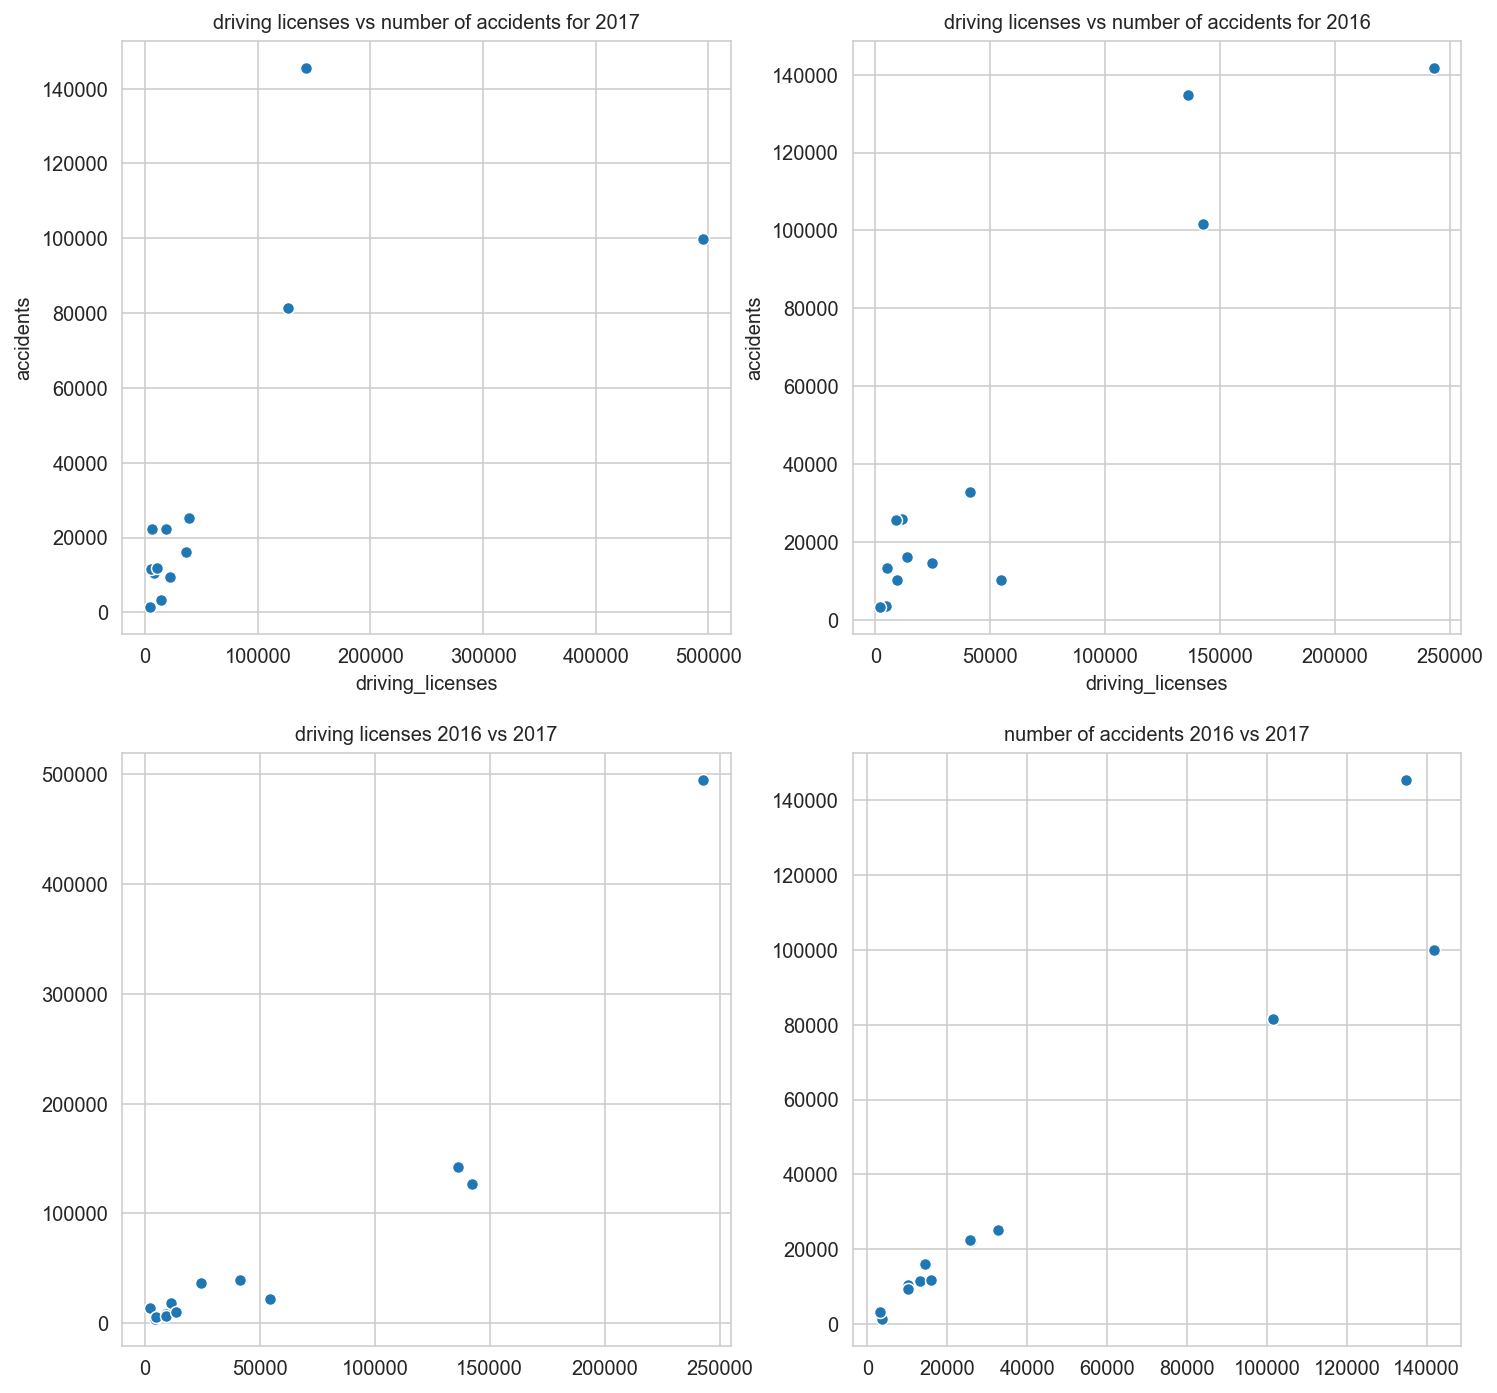

In [74]:
#create a plot for each two variables..
fig, ax = plt.subplots(ncols=2, nrows=2, figsize=(12, 12))
sns.scatterplot(both_accid_lic.loc[both_accid_lic.year == 2017,'driving_licenses'], both_accid_lic.loc[both_accid_lic.year == 2017, 'accidents'], ax=ax[0,0])
sns.scatterplot(both_accid_lic.loc[both_accid_lic.year == 2016,'driving_licenses'], both_accid_lic.loc[both_accid_lic.year == 2016, 'accidents'], ax=ax[0,1])
sns.scatterplot(both_accid_lic.loc[both_accid_lic.year == 2016,'driving_licenses'].values, both_accid_lic.loc[both_accid_lic.year == 2017, 'driving_licenses'].values, ax=ax[1,0])
sns.scatterplot(both_accid_lic.loc[both_accid_lic.year == 2016,'accidents'].values, both_accid_lic.loc[both_accid_lic.year == 2017, 'accidents'].values, ax=ax[1,1])
ax[0,0].set_title('driving licenses vs number of accidents for 2017', fontsize=10)
ax[0,1].set_title('driving licenses vs number of accidents for 2016', fontsize=10)
ax[1,0].set_title('driving licenses 2016 vs 2017', fontsize=10)
ax[1,1].set_title('number of accidents 2016 vs 2017', fontsize=10)
plt.show()

#### Plot and interpret boxplots

For each numeric variable in the dataframe create a boxplot using Seaborn. Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.

Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).

Each boxplot should:
- Only include variables of a similar scale
- Have clear labels for each variable
- Have appropriate titles and labels

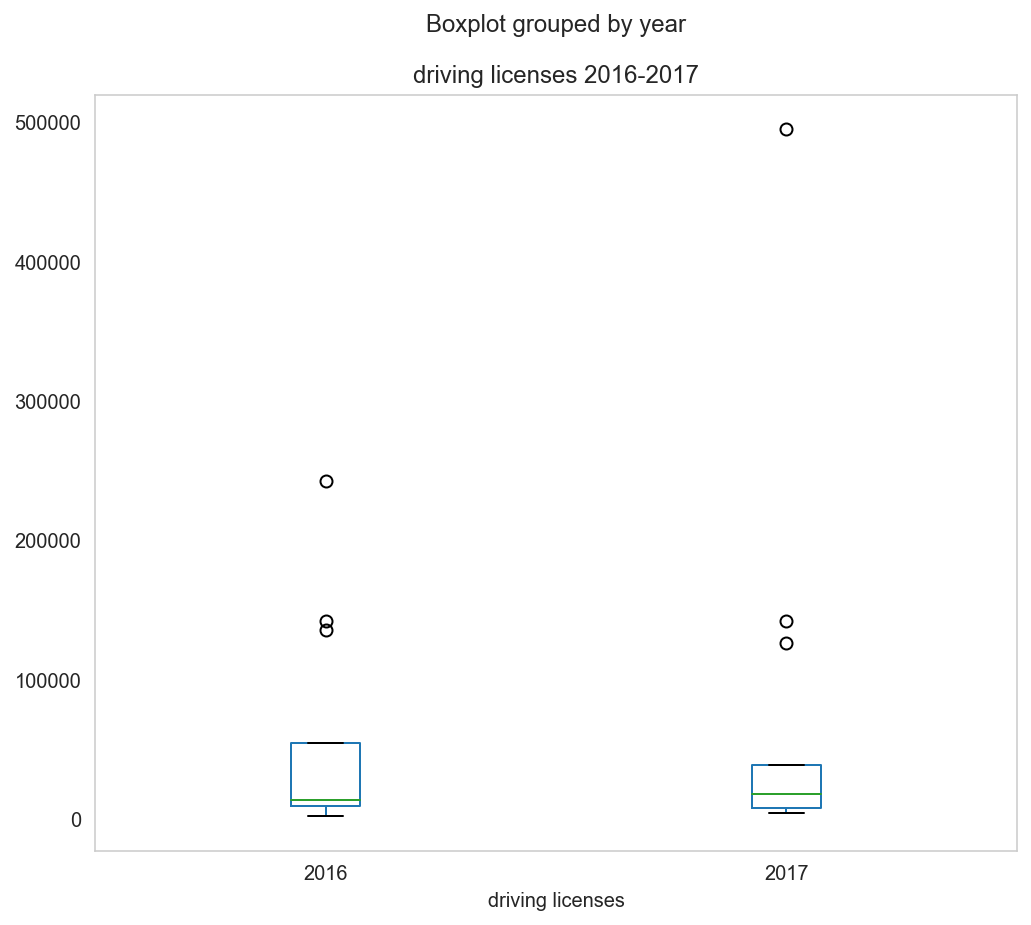

In [75]:
# Code
#creat a boxplot for driving licenses by the years 2016-2017
both_accid_lic.boxplot(by ='year', column =['driving_licenses'], grid = False, figsize=(8,7))
plt.xlabel('driving licenses')
plt.title('driving licenses 2016-2017')
plt.show()
#

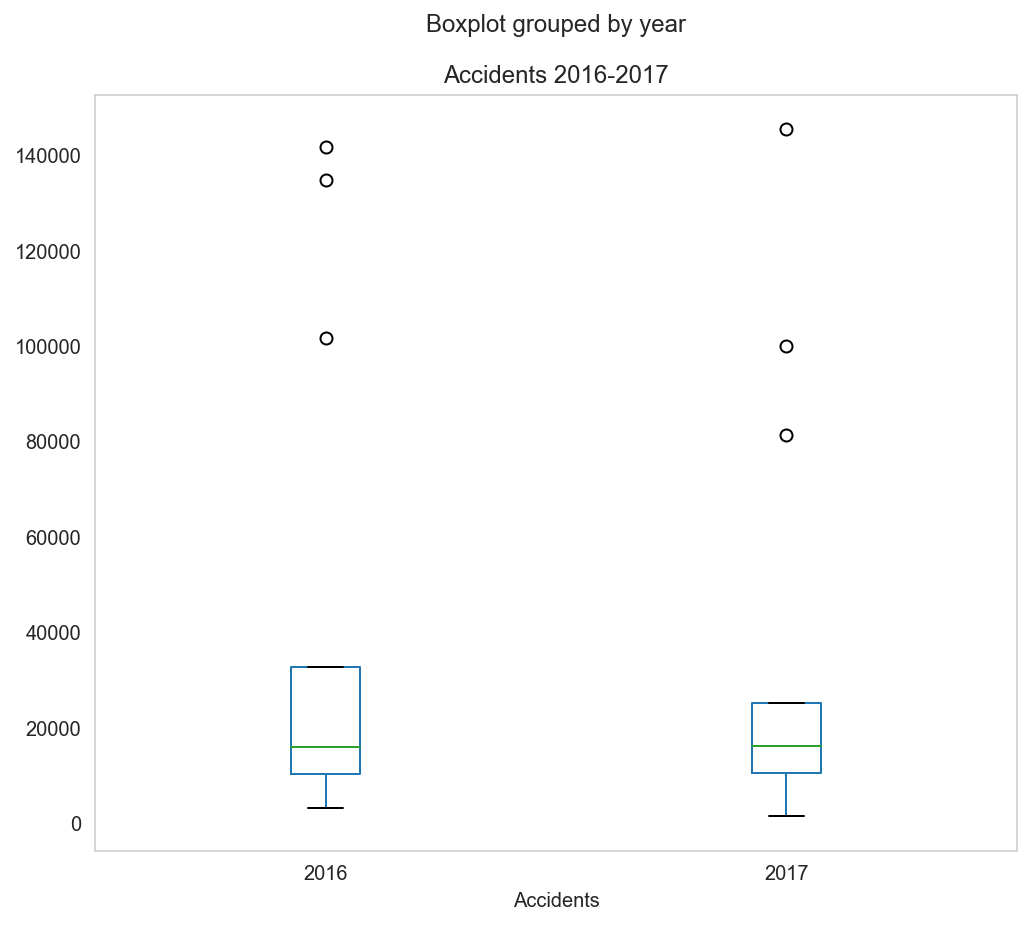

In [76]:
#creat a boxplot for accidents by the years 2016-2017
both_accid_lic.boxplot(by ='year', column =['accidents'], grid = False, figsize=(8,7))
plt.xlabel('Accidents')
plt.title('Accidents 2016-2017')
plt.show()

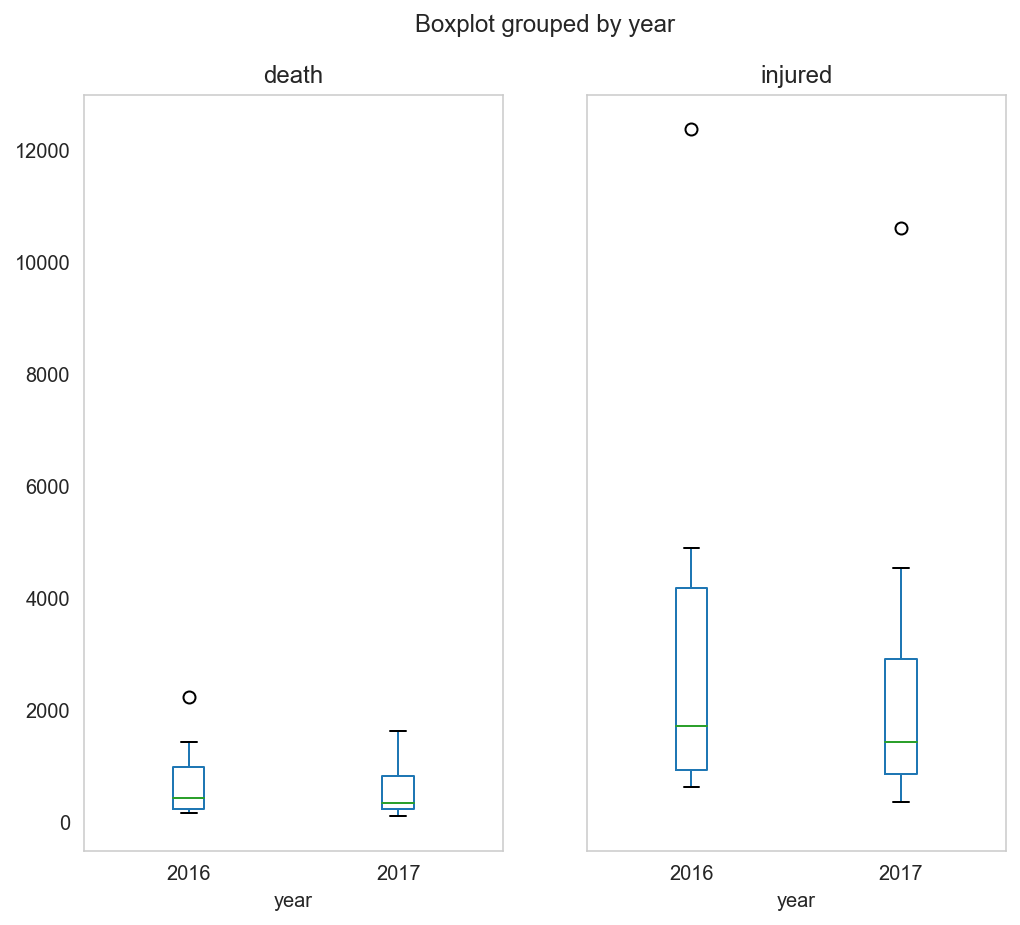

In [83]:
#creat a boxplot for 'death','injured' by the years 2016-2017
both_accid_lic.boxplot(by ='year', column=['death','injured'], grid = False, figsize=(8,7))
plt.show()

#### Feel free to do additional plots below
*(do research and choose your own chart types & variables)*

Are there any additional trends or relationships you haven't explored? Was there something interesting you saw that you'd like to dive further into? It's likely that there are a few more plots you might want to generate to support your narrative and recommendations that you are building toward. **As always, make sure you're interpreting your plots as you go**.

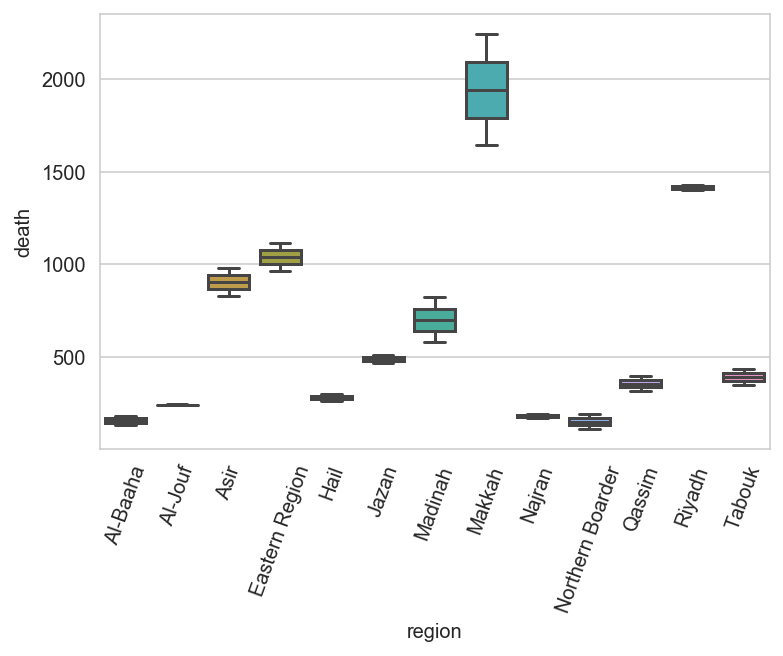

In [78]:
#create a boxplot for number of death in each region..
sns.boxplot(x='region', y='death', data=both_accid_lic)
plt.xticks(rotation=70);

## Descriptive and Inferential Statistics

#### Summarizing Distributions

Above, we used pandas `describe` to provide quick summary statistics of our numeric columns. We also demonstrated many visual relationships.

As data scientists, having a complete understanding of data is imperative prior to modeling.

While we will continue to build our analytic tools, we know that measures of *central tendency*, *spread*, and *shape/skewness* provide a quick summary of distributions.

For each variable in your data, summarize the underlying distributions (in words & statistics)
 - Be thorough in your verbal description of these distributions.
 - Be sure to back up these summaries with statistics.

In [79]:
#using .describe 
both_accid_lic.describe()

,year,accidents,death,injured,driving_licenses,latitude_lic,longitude_lic,year_m_lic,year_m_accid
count,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000
mean,2016.500000,38225.692308,635.384615,2743.038462,62507.000000,23.810447,42.602789,62507.000000,38225.692308
std,0.509902,46493.705035,549.783381,2922.641127,107293.917762,4.274533,3.313532,9066.370481,2859.059464
min,2016.000000,1414.000000,112.000000,374.000000,2153.000000,17.207231,37.259858,53616.692308,35422.153846
25%,2016.000000,10276.250000,241.250000,923.000000,8363.250000,20.148406,41.263690,53616.692308,35422.153846
50%,2016.500000,16050.500000,415.500000,1618.500000,16085.000000,23.288331,41.817119,62507.000000,38225.692308
75%,2017.000000,30981.250000,929.250000,3784.000000,51222.000000,27.400846,43.343000,71397.307692,41029.230769
max,2017.000000,145541.000000,2243.000000,12383.000000,495307.000000,30.197075,50.147830,71397.307692,41029.230769


Answers:

- accidents:

Number of accidents show(positively skewed).the higher level of accidents was in Riyadh, Eastern region and Makkah regions. This is due to the population density in those key regions of Saudi Arabia as opposed to other regions.

- death:

Number of deaths resulting from accidents is (positively skewed) becase the mean > median (which seen From the table above).

- injured:

Number of deaths resulting from accidents is (positively skewed) becase the mean > median (which seen From the table above).

- driving_licenses:

Number of driving licenses shows(positive skewness).the higher level of driving licenses was in Riyadh, Eastern region and Makkah regions. This is due to the population density in those key regions of Saudi Arabia as opposed to other regions. 

Text(0.5, 0, 'number of driving licenses issued')

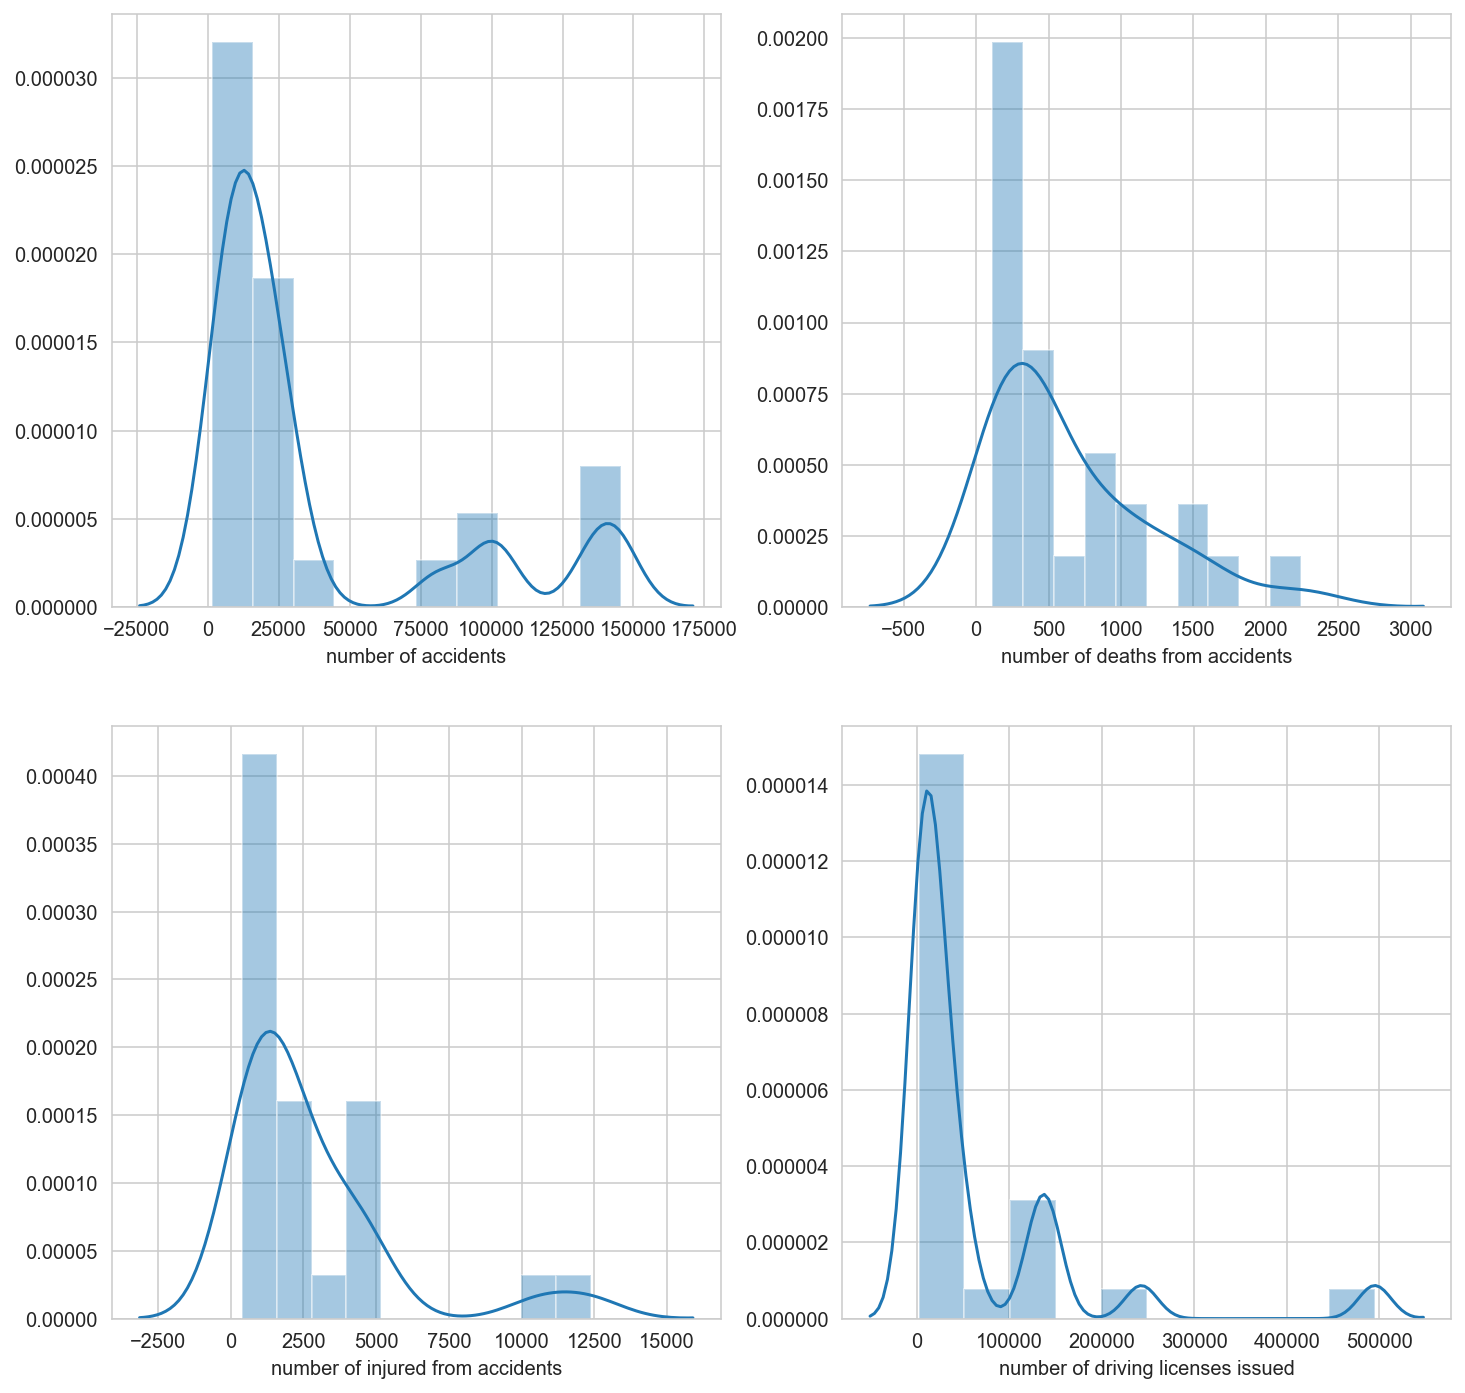

In [81]:
# create a subplot for the numaric features.. 
fig, ax = plt.subplots(ncols=2, nrows=2, figsize=(12, 12))
sns.distplot(both_accid_lic.accidents, bins=10, kde=True, ax=ax[0,0])
sns.distplot(both_accid_lic.death, bins=10, kde=True, ax=ax[0,1])
sns.distplot(both_accid_lic.injured, bins=10, kde=True, ax=ax[1,0])
sns.distplot(both_accid_lic .driving_licenses, bins=10, kde=True, ax=ax[1,1])
ax[0,0].set_xlabel('number of accidents', fontsize=10)
ax[0,1].set_xlabel('number of deaths from accidents', fontsize=10)
ax[1,0].set_xlabel('number of injured from accidents',fontsize=10)
ax[1,1].set_xlabel('number of driving licenses issued', fontsize=10)

#### We generally assuming that data we sample from a population will be normally distributed. Do we observe this trend?

Answer:

Does This Assumption Hold for:
    - Driving Licenses
    - Traffic Accidents
Explain your answers for each distribution and how you think this will affect estimates made from these data.

Answer: 

As we see in histograms for each variables, they are all (positively skewed) and that's will affect in the answers. So, in skewed data, the tail region may act as an outlier for the statistical model and we know that outliers adversely affect the model’s performance..

#### Statistical Evaluation of Distributions 

**If you feel it's appropriate**, using methods we discussed in class, run hypothesis tests to compare variables of interest in our dataset. 

In [92]:
# Code

## Outside Research

Based upon your observations, choose **three** regions that demonstrate interesting trends in the number of driving licenses and traffic accidents. Spend some time doing outside research on provincial and central policies that might influence these rates, and summarize your findings below. **Feel free to go back and create new plots that highlight these states of interest**. If you bring in any outside tables or charts, make sure you are explicit about having borrowed them. If you quote any text, make sure that it renders as being quoted. (Make sure that you cite your sources -- check with you local instructor for citation preferences).

Answer:

## Conclusions and Recommendations

- Based on your exploration of the data, what are you key takeaways and recommendations?
- Are there additional data you desire that would better inform your investigations?

**Conclusion:**
- This report was created to help identify the causes of the increase in traffic accidents and how to find solutions to facilitate road traffic in Saudi Arabia. The data analyzed showed that the trend was to reduce the number of traffic accidents.During the years (2016-2017), data from the Traffic Department of the Ministry of Interior showed an increase in the main regions of Makkah, Riyadh and the Eastern region above the mean number of accidents. 

**kay takeaways:**

- You have to be careful and focus when driving in the major regions of Saudi Arabia. Accidents show much higher than the mean number of accidents in these regions.

- The traffic department should conduct more scrutiny and develop plans for the most densely populated regions.



**Additional data:**

- Other country data accidents to understand where KSA sits in comparison with other countries.
- Population data for each region so we can estimate the incidence of accidents more clearly based on population density.

# blog link:

https://accidentsksa.blogspot.com/